# Data exploration : Protein Function Prediction

## Data Loading

In [1]:
import numpy as np
from zipfile import ZipFile
from sklearn import linear_model, preprocessing
from datetime import datetime

debut = datetime.now()

X = np.loadtxt("data/protein_train.data")
y = np.loadtxt("data/protein_train.solution")

X_test = np.loadtxt("data/protein_test.data")
X_valid = np.loadtxt("data/protein_valid.data")

## First Data description

In [2]:
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

In [11]:
print(f"Memory size of X {(X.itemsize * X.size) / 1024 ** 2} MBytes")

Memory size of X 385.8057861328125 MBytes


In [3]:
X.shape, y.shape

((53118, 952), (53118,))

In [4]:
scaler_std = preprocessing.StandardScaler(with_mean=False)
scaler_std.fit(X)
X_scaled_std = scaler_std.transform(X)

In [5]:
desc = pd.DataFrame(X_scaled).describe()
desc

,0,1,2,3,4,5,6,7,8,9,...,942,943,944,945,946,947,948,949,950,951
count,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,...,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000,53118.000000
mean,2.668639,2.751477,2.353097,3.282547,2.234611,3.085485,1.996661,1.147431,1.859282,2.597294,...,1.268619,0.957275,-0.198331,-1.195411,1.231970,-1.295354,-1.258102,0.311701,0.921387,1.135651
std,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009,...,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009,1.000009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010403,-2.025133,-62.597646,-48.378017,-0.445146,-39.500166,-50.935961,-12.595393,-1.331720,-1.095032
25%,2.005193,2.110927,1.651076,2.623935,1.606799,2.417092,1.363592,0.451840,1.208807,2.008755,...,0.628654,0.323165,-0.532378,-1.544028,0.584943,-1.712294,-1.624877,-0.153756,0.337234,0.506356
50%,2.598278,2.697296,2.251468,3.203641,2.195958,3.043746,1.868626,0.994047,1.717779,2.661600,...,1.051461,0.730786,-0.130343,-0.979152,1.013455,-1.096064,-1.034769,0.191463,0.708476,0.918205
75%,3.247848,3.361847,2.889384,3.874880,2.785118,3.670399,2.474667,1.626622,2.417614,3.214008,...,1.654493,1.341699,0.249682,-0.581172,1.641176,-0.632167,-0.626287,0.600720,1.264980,1.516228
max,13.245571,18.763797,12.495646,10.160119,15.585947,12.980680,23.585096,12.922610,17.814001,11.901872,...,48.762033,44.645032,10.848220,0.024604,46.168808,1.023037,0.147686,48.899170,49.855905,41.080819


31 outliers deleted


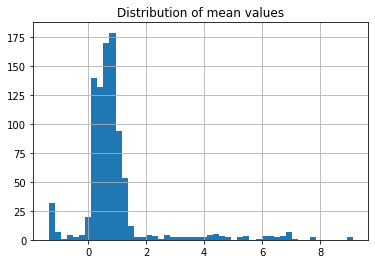

45 outliers deleted


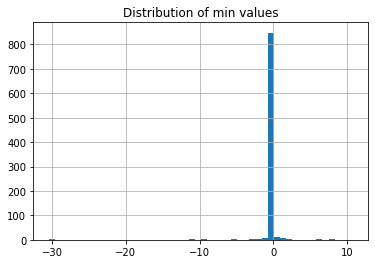

32 outliers deleted


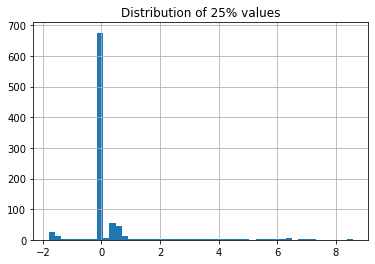

32 outliers deleted


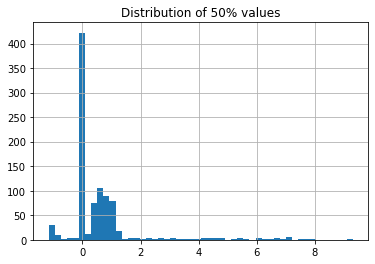

31 outliers deleted


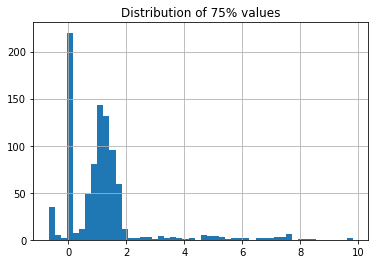

13 outliers deleted


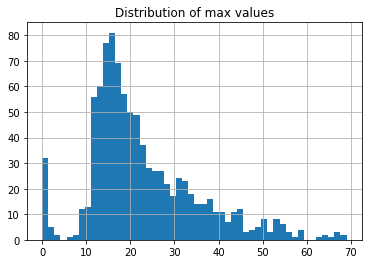

In [7]:
def describe_histograms(desc, rm_outliers=True):
    for line in desc.index[1:].drop("std"):
        values = desc.loc[line]
        if rm_outliers:
            values = remove_outliers(values)
        values.hist(bins=50)
        plt.title(f"Distribution of {line} values")
        plt.show()

describe_histograms(desc)